# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**
- **Sugestão de exercício:**
    - Importe a base
    - Comece explorando esses dados
    - Trate valores vazios
    - Escolha 2 ou 3 algoritmos
    - Crie modelos usando esses algoritmos e avalie o melhor modelo
    - Faça a previsão para os dados de teste

In [508]:
import pandas as pd

In [509]:
base_train = pd.read_csv("train.csv")
base_teste = pd.read_csv("test.csv")         

In [510]:
# Dropar target
y = base_train['SalePrice']
base_train = base_train.drop('SalePrice', axis=1)

# Avaliando a base

### Verificar colunas com valores ausentes

In [511]:
base_train.shape

(1460, 80)

In [512]:
# Filtra colunas com ao menos um valor nulo
base_train.columns[base_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [513]:
train_null = base_train[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]

In [514]:
nulos = train_null.isnull().sum().reset_index()
nulos.index = nulos.index.astype(str)
nulos[0] = round(nulos[0]/train_null.shape[0]*100,2)
nulos

,index,0
0,LotFrontage,17.74
1,Alley,93.77
2,MasVnrType,59.73
3,MasVnrArea,0.55
4,BsmtQual,2.53
5,BsmtCond,2.53
6,BsmtExposure,2.60
7,BsmtFinType1,2.53
8,BsmtFinType2,2.60
9,Electrical,0.07


In [515]:
# porcentagem de nulos
drop = train_null.columns[nulos[0] > 40]
drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [516]:
# Dropar colunas com alto percentual de valores faltantes
base_train = base_train.drop(drop, axis=1)
base_teste = base_teste.drop(drop,axis=1)
base_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


### Tratar valores ausentes

In [517]:
nulos = base_train.columns[base_train.isnull().any()]
nulos

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [518]:
base_train[nulos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [519]:
base_null = base_train[nulos]
base_null.head(3)

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA


**Tratar colunas numéricas**

In [520]:
# Valores numéricos
base_null.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [521]:
base_train.LotFrontage.median()

69.0

In [522]:
# Coluna LotFrontage, como o valor máximo é consideravelmente maior que o 75% não considero a média
# e sim a mediana para evitar influência de outlier
base_train.loc[base_train.LotFrontage.isnull(), 'LotFrontage'] = base_train.LotFrontage.median()
base_train.LotFrontage.isnull().sum()

0

In [523]:
# Coluna MasVnrArea, podemos notar que praticamente 60% dos valores são 0
# Isso significa que a chance de um valor ausente ser 0 é de quase 60%, podemos então considerar 0 em todos nulos
print("59% desses dados são {}".format(base_train.MasVnrArea.quantile(0.59)))
base_train.loc[base_train.MasVnrArea.isnull(),'MasVnrArea'] = 0
base_train.MasVnrArea.isnull().sum()

59% desses dados são 0.0


0

In [524]:
# A coluna GarageYrBlt pode ser atribuida a média nos valores nulos por não conter outliers e possuir baixo desvio padrão
base_train.loc[base_train.GarageYrBlt.isnull(),'GarageYrBlt'] = 0
base_train.GarageYrBlt.isnull().sum()

0

**Tratar colunas não numéricas**

In [525]:
nulos = base_train.columns[base_train.isnull().any()]
nulos

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [526]:
base_train[nulos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinType2  1422 non-null   object
 5   Electrical    1459 non-null   object
 6   GarageType    1379 non-null   object
 7   GarageFinish  1379 non-null   object
 8   GarageQual    1379 non-null   object
 9   GarageCond    1379 non-null   object
dtypes: object(10)
memory usage: 114.2+ KB


In [527]:
base_train[nulos].nunique()

BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
Electrical      5
GarageType      6
GarageFinish    3
GarageQual      5
GarageCond      5
dtype: int64

**Aquelas colunas que apresentarem uma classe predominante assumirão essa classe nos seus valores ausentes**

In [528]:
base_train.loc[base_train.BsmtQual.isnull(),'BsmtQual'] = 'TA'
base_train['BsmtQual'].value_counts()

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [529]:
base_train.loc[base_train.BsmtCond.isnull(),'BsmtCond'] = 'TA'
base_train['BsmtCond'].value_counts()

BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [530]:
base_train.loc[base_train.BsmtExposure.isnull(),'BsmtExposure'] = 'No'
base_train['BsmtExposure'].value_counts()

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [531]:
base_train.loc[base_train.BsmtFinType1.isnull(),'BsmtFinType1'] = 'Unf'
base_train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [532]:
base_train.loc[base_train.BsmtFinType2.isnull(),'BsmtFinType2'] = 'Unf'
base_train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [533]:
base_train.loc[base_train.Electrical.isnull(),'Electrical'] = 'SBrkr'
base_train['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [534]:
base_train.loc[base_train.GarageType.isnull(),'GarageType'] = 'Attchd'
base_train['GarageType'].value_counts()

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [535]:
base_train.loc[base_train.GarageFinish.isnull(),'GarageFinish'] = 'Unf'
base_train['GarageFinish'].value_counts()

GarageFinish
Unf    686
RFn    422
Fin    352
Name: count, dtype: int64

In [536]:
base_train.loc[base_train.GarageQual.isnull(),'GarageQual'] = 'TA'
base_train['GarageQual'].value_counts()

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [537]:
base_train.loc[base_train.GarageCond.isnull(),'GarageCond'] = 'TA'
base_train['GarageCond'].value_counts()

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [538]:
# Verificar novamente as colunas com valores nulos
base_train.columns[base_train.isnull().any()]

Index([], dtype='object')

### Verificar colunas com alta cardinalidade

In [539]:
# Colunas que apresentam cardinalidade acima de 10% da quantidade de linhas
drop_card = base_train.columns[((base_train.nunique()/base_train.shape[0])*100)>10]
drop_card

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')

**Verificar se dá para tratar essas colunas**

In [540]:
# As colunas que apresentam desvio padrão maior que a média podem ser descartadas (valores mal distribuidos)
print(base_train[drop_card].columns[base_train[drop_card].mean() < base_train[drop_card].std()].values)
base_train = base_train.drop(base_train[drop_card].columns[base_train[drop_card].mean() < base_train[drop_card].std()],axis=1)
drop_card = base_train.columns[((base_train.nunique()/base_train.shape[0])*100)>10]

['MasVnrArea' 'BsmtFinSF1' '2ndFlrSF' 'WoodDeckSF' 'OpenPorchSF']


In [541]:
# Todas essas colunas são numericas?
base_train[drop_card].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           1460 non-null   int64
 1   LotArea      1460 non-null   int64
 2   BsmtUnfSF    1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   1stFlrSF     1460 non-null   int64
 5   GrLivArea    1460 non-null   int64
 6   GarageArea   1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


**Como todas essas colunas são numéricas, podemos tratá-las utilizando a técnica de Discretização**

In [542]:
base_train['BsmtUnfSF'].value_counts()

BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64

In [543]:
# Importando o KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

In [544]:
# Definindo nossa discretização
est = KBinsDiscretizer(n_bins=10, encode='ordinal')

In [545]:
# Fazendo o fit e transformando
est1 = est.fit(base_train[['LotArea']])
base_train['LotArea'] = est1.transform(base_train[['LotArea']])
est2 = est.fit(base_train[['BsmtUnfSF']])
base_train['BsmtUnfSF'] = est2.transform(base_train[['BsmtUnfSF']])
est3 = est.fit(base_train[['TotalBsmtSF']])
base_train['TotalBsmtSF'] = est3.transform(base_train[['TotalBsmtSF']])
est4 = est.fit(base_train[['1stFlrSF']])
base_train['1stFlrSF'] = est4.transform(base_train[['1stFlrSF']])
est5 = est.fit(base_train[['GrLivArea']])
base_train['GrLivArea'] = est5.transform(base_train[['GrLivArea']])
est6 = est.fit(base_train[['GarageArea']])
base_train['GarageArea'] = est6.transform(base_train[['GarageArea']])

In [546]:
# Verificando a cardinalidade dos dados novamente
# Apenas a coluna target apresenta cardinalidade alta
base_train = base_train.drop(['Id'],axis=1)
base_train.columns[((base_train.nunique()/base_train.shape[0])*100)>10]

Index([], dtype='object')

## Tratar colunas do tipo object

In [547]:
base_obj = base_train[base_train.select_dtypes(include=['object']).columns]

**Tratar colunas com apenas dois valores distintos**

In [548]:
base_obj.nunique() == 2

MSZoning         False
Street            True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir        True
Electrical       False
KitchenQual      False
Functional       False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [549]:
base_binary = base_train[base_obj.columns[base_obj.nunique() == 2]]
base_binary

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y
1458,Pave,AllPub,Y


In [550]:
base_train['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [551]:
base_train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [552]:
base_train['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [553]:
# Como existe uma predominância muito grande de uma só classe, podemos descartar essas colunas do modelo
base_train = base_train.drop(base_binary.columns, axis=1)

**Tratar demais colunas object**

In [554]:
base_Nclass = base_train[base_obj.columns[base_obj.nunique() > 2]]
base_Nclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LandContour    1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   LandSlope      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  RoofMatl       1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  ExterQual      1460 non-null   object
 15  ExterCond      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  BsmtQual       1460 non-null   object
 18  BsmtCond       1460 non-null

In [555]:
# Identificar colunas com um valor muito predominante (>70%)
predominant_columns = []
threshold = 0.7

for col in base_Nclass.columns:
    most_frequent_value = base_Nclass[col].value_counts(normalize=True).max()
    if most_frequent_value >= threshold:
        predominant_columns.append(col)

predominant_columns

['MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [556]:
# Dropar as colunas encontradas
base_train = base_train.drop(predominant_columns,axis=1)
base_train

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,3.0,Reg,CollgCr,2Story,7,5,2003,2003,...,RFn,2,6.0,0,0,0,0,0,2,2008
1,20,80.0,5.0,Reg,Veenker,1Story,6,8,1976,1976,...,RFn,2,4.0,0,0,0,0,0,5,2007
2,60,68.0,7.0,IR1,CollgCr,2Story,7,5,2001,2002,...,RFn,2,7.0,0,0,0,0,0,9,2008
3,70,60.0,5.0,IR1,Crawfor,2Story,7,5,1915,1970,...,Unf,3,8.0,272,0,0,0,0,2,2006
4,60,84.0,8.0,IR1,NoRidge,2Story,8,5,2000,2000,...,RFn,3,9.0,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,2.0,Reg,Gilbert,2Story,6,5,1999,2000,...,RFn,2,4.0,0,0,0,0,0,8,2007
1456,20,85.0,8.0,Reg,NWAmes,1Story,6,6,1978,1988,...,Unf,2,5.0,0,0,0,0,0,2,2010
1457,70,66.0,4.0,Reg,Crawfor,2Story,7,9,1941,2006,...,RFn,1,1.0,0,0,0,0,2500,5,2010
1458,20,68.0,5.0,Reg,NAmes,1Story,5,6,1950,1996,...,Unf,1,1.0,112,0,0,0,0,4,2010


**Tratar colunas >40% threshold**

In [557]:
base_Nclass = base_Nclass.drop(predominant_columns, axis=1)

In [558]:
binary_columns = []
threshold = 0.4

for col in base_Nclass.columns:
    most_frequent_value = base_Nclass[col].value_counts(normalize=True).max()
    if most_frequent_value >= threshold:
        binary_columns.append(col)

binary_columns

['LotShape',
 'HouseStyle',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [559]:
# Atribuindo 1 ao valor de maior frequencia e 0 aos demais
for i in binary_columns:
    base_train[i] = base_train[i].apply(lambda x: 1 if x == base_Nclass[i].value_counts().reset_index().iloc[0][0] else 0)

**Tratar demais colunas**

In [560]:
base_obj = base_train[base_train.select_dtypes(include=['object']).columns]
base_obj

,Neighborhood,Exterior1st,Exterior2nd,BsmtFinType1
0,CollgCr,VinylSd,VinylSd,GLQ
1,Veenker,MetalSd,MetalSd,ALQ
2,CollgCr,VinylSd,VinylSd,GLQ
3,Crawfor,Wd Sdng,Wd Shng,ALQ
4,NoRidge,VinylSd,VinylSd,GLQ
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,Unf
1456,NWAmes,Plywood,Plywood,ALQ
1457,Crawfor,CemntBd,CmentBd,GLQ
1458,NAmes,MetalSd,MetalSd,GLQ


In [561]:
base_obj.nunique()

Neighborhood    25
Exterior1st     15
Exterior2nd     16
BsmtFinType1     6
dtype: int64

In [562]:
base_train.BsmtFinType1.value_counts()

BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [563]:
# As 3 primeiras colunas vão ser descartadas pois ao utilizar o one hot encoder se transformariam em muitas colunas
base_train = base_train.drop(['Neighborhood','Exterior1st','Exterior2nd'], axis=1)

In [564]:
# Limitar em 4 valores
base_train.BsmtFinType1 = base_train['BsmtFinType1'].apply(lambda x: 'Unf' if x == 'Unf' else 'GLQ' if x == 'GLQ' else 'ALQ' if x == 'ALQ' else 'outros')

In [565]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe = ohe.fit(base_train[['BsmtFinType1']])
ohe.transform(base_train[['BsmtFinType1']]).toarray()
ohe_df = pd.DataFrame(ohe.transform(base_train[['BsmtFinType1']]).toarray())
ohe_df.columns = ohe.get_feature_names_out()
ohe_df.head()

,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [566]:
# Drop da coluna BsmtFinType1 e concatenar com o OHE criado
base_train = base_train.drop('BsmtFinType1',axis=1)

In [567]:
base_train = pd.concat([base_train,ohe_df],axis=1)
base_train

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
0,60,65.0,3.0,1,0,7,5,2003,2003,0,...,0,0,0,0,2,2008,0.0,1.0,0.0,0.0
1,20,80.0,5.0,1,1,6,8,1976,1976,1,...,0,0,0,0,5,2007,1.0,0.0,0.0,0.0
2,60,68.0,7.0,0,0,7,5,2001,2002,0,...,0,0,0,0,9,2008,0.0,1.0,0.0,0.0
3,70,60.0,5.0,0,0,7,5,1915,1970,1,...,0,0,0,0,2,2006,1.0,0.0,0.0,0.0
4,60,84.0,8.0,0,0,8,5,2000,2000,0,...,0,0,0,0,12,2008,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,2.0,1,0,6,5,1999,2000,1,...,0,0,0,0,8,2007,0.0,0.0,1.0,0.0
1456,20,85.0,8.0,1,1,6,6,1978,1988,1,...,0,0,0,0,2,2010,1.0,0.0,0.0,0.0
1457,70,66.0,4.0,1,0,7,9,1941,2006,0,...,0,0,0,2500,5,2010,0.0,1.0,0.0,0.0
1458,20,68.0,5.0,1,1,5,6,1950,1996,1,...,0,0,0,0,4,2010,0.0,1.0,0.0,0.0


**Como ficou nossa base?**

In [568]:
# Colunas do tipo object
base_train[base_train.select_dtypes(include=['object']).columns].columns

Index([], dtype='object')

In [569]:
# Valores nulos
base_train.isnull().sum().sum()

0

In [570]:
# cardinalidade das features
(base_train.nunique()/base_train.shape[0])*100

MSSubClass             1.027397
LotFrontage            7.534247
LotArea                0.684932
LotShape               0.136986
HouseStyle             0.136986
OverallQual            0.684932
OverallCond            0.616438
YearBuilt              7.671233
YearRemodAdd           4.178082
ExterQual              0.136986
Foundation             0.136986
BsmtQual               0.136986
BsmtExposure           0.136986
BsmtFinSF2             9.863014
BsmtUnfSF              0.684932
TotalBsmtSF            0.684932
HeatingQC              0.136986
1stFlrSF               0.684932
LowQualFinSF           1.643836
GrLivArea              0.684932
BsmtFullBath           0.273973
BsmtHalfBath           0.205479
FullBath               0.273973
HalfBath               0.205479
BedroomAbvGr           0.547945
KitchenAbvGr           0.273973
KitchenQual            0.136986
TotRmsAbvGrd           0.821918
Fireplaces             0.273973
GarageType             0.136986
GarageYrBlt            6.712329
GarageFi

In [571]:
# Não faz sentido existir valores 0 na coluna GarageYrBlt, substituir pela média sem os valores 0
base_train.loc[base_train.GarageYrBlt == 0,'GarageYrBlt'] = base_train.GarageYrBlt[base_train.GarageYrBlt != 0].mean()

**Normalização das colunas**

In [572]:
# Colunas com elevada incidencia de zeros
baseZ = base_train.columns[base_train.quantile(0.25) == 0]
baseZ

Index(['LotShape', 'HouseStyle', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF2', 'HeatingQC', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageType', 'GarageFinish', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinType1_ALQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'BsmtFinType1_outros'],
      dtype='object')

In [573]:
# Dessas colunas utilizar a técnica MaxAbsScaler

In [574]:
# Importando o MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

In [575]:
# Criando o scaler
scaler = MaxAbsScaler()

In [576]:
# Fazendo o fit com os dados
scaler = scaler.fit(base_train[baseZ])

In [577]:
# Fazendo a transformação
base_train[baseZ] = scaler.transform(base_train[baseZ])

In [578]:
base_train[baseZ].describe()

,LotShape,HouseStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF2,HeatingQC,LowQualFinSF,BsmtFullBath,...,GarageFinish,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.633562,0.497260,0.620548,0.443151,0.469863,0.678767,0.031580,0.507534,0.010218,0.141781,...,0.469863,0.039772,0.006712,0.031377,0.003738,0.002806,0.150685,0.286301,0.319863,0.243151
std,0.481996,0.500164,0.485417,0.496928,0.499262,0.467110,0.109443,0.500115,0.085005,0.172970,...,0.499262,0.110723,0.057711,0.116161,0.054441,0.032008,0.357864,0.452187,0.466583,0.429132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [579]:
base2 = base_train.drop(baseZ,axis=1)
base2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,4.502740,6.099315,5.575342,1971.267808,1984.865753,4.504110,4.504795,4.508219,4.504795,1.565068,2.866438,1.046575,6.517808,1978.506164,1.767123,4.524658,6.321918,2007.815753
std,42.300571,22.027677,2.869445,1.382997,1.112799,30.202904,20.645407,2.874932,2.873739,2.872538,2.871591,0.550916,0.815778,0.220338,1.625393,23.994583,0.747315,2.855932,2.703626,1.328095
min,20.000000,21.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1962.000000,1.000000,2.000000,5.000000,2007.000000
50%,50.000000,69.000000,4.500000,6.000000,5.000000,1973.000000,1994.000000,4.500000,4.500000,4.500000,5.000000,2.000000,3.000000,1.000000,6.000000,1978.506164,2.000000,5.000000,6.000000,2008.000000
75%,70.000000,79.000000,7.000000,7.000000,6.000000,2000.000000,2004.000000,7.000000,7.000000,7.000000,7.000000,2.000000,3.000000,1.000000,7.000000,2001.000000,2.000000,7.000000,8.000000,2009.000000
max,190.000000,313.000000,9.000000,10.000000,9.000000,2010.000000,2010.000000,9.000000,9.000000,9.000000,9.000000,3.000000,8.000000,3.000000,14.000000,2010.000000,4.000000,9.000000,12.000000,2010.000000


In [580]:
# Filtrar bases com possiveis outliers, valor máximo - terceiro quartil ser maior que o próprio terceiro quartil
base_OL = base2.columns[(base2.max() - base2.quantile(0.75)) > base2.quantile(0.75)]
base_NOL = base2.columns[(base2.max() - base2.quantile(0.75)) < base2.quantile(0.75)]
base_OL

Index(['MSSubClass', 'LotFrontage', 'BedroomAbvGr', 'KitchenAbvGr'], dtype='object')

**A normalização das features com outliers utiliza RobustScaler**

In [581]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

In [582]:
# Criando o scaler
RB_scaler = RobustScaler()

In [583]:
# Fazendo o fit com os dados
RB_scaler = RB_scaler.fit(base_train[base_OL])

In [584]:
# Fazendo a transformação
base_train[base_OL] = RB_scaler.transform(base_train[base_OL])

In [585]:
base_train[base_OL].describe()

,MSSubClass,LotFrontage,BedroomAbvGr,KitchenAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.137945,0.045458,-0.133562,0.046575
std,0.846011,1.159351,0.815778,0.220338
min,-0.600000,-2.526316,-3.000000,-1.000000
25%,-0.600000,-0.473684,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.526316,0.000000,0.000000
max,2.800000,12.842105,5.000000,2.000000


**A normalização das features sem outliers utiliza StandardScaler**

In [586]:
# Importando o StandardScaler
from sklearn.preprocessing import StandardScaler

In [587]:
# Criando nosso scaler
S_scaler = StandardScaler()

In [588]:
# Fazendo o fit com os dados
S_scaler = S_scaler.fit(base_train[base_NOL])

In [589]:
# Fazendo o transform dos dados
base_train[base_NOL] = S_scaler.transform(base_train[base_NOL])

In [590]:
base_train[base_OL].describe()

,MSSubClass,LotFrontage,BedroomAbvGr,KitchenAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.137945,0.045458,-0.133562,0.046575
std,0.846011,1.159351,0.815778,0.220338
min,-0.600000,-2.526316,-3.000000,-1.000000
25%,-0.600000,-0.473684,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.526316,0.000000,0.000000
max,2.800000,12.842105,5.000000,2.000000


## Dividir base em treino e teste

In [591]:
X = base_train

In [592]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Testar modelos de regressão

## Regressão Linear

In [593]:
from sklearn.linear_model import LinearRegression

In [594]:
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [595]:
# Obter os coeficientes das features e ordenar por ordem de importancia
importances = rl.coef_

feature_importance_rl = pd.Series(abs(importances), index=X_train.columns).sort_values(ascending=False)
print(feature_importance_rl)

MiscVal                60580.266819
PoolArea               53251.711288
BsmtFinSF2             33465.997960
KitchenAbvGr           25983.183632
OverallQual            23552.321105
ScreenPorch            23186.213533
3SsnPorch              19516.879470
Fireplaces             17346.002485
HalfBath               15524.232425
TotalBsmtSF            14936.632582
BsmtFullBath           14528.309634
GrLivArea              12208.652265
BsmtExposure           12144.654352
GarageCars              9926.048548
TotRmsAbvGrd            9435.125231
BsmtUnfSF               9403.304146
BedroomAbvGr            8916.190054
ExterQual               7919.098309
LotArea                 7193.504121
BsmtHalfBath            6571.492729
Foundation              6383.602031
MSSubClass              5626.542038
FullBath                5269.561368
HouseStyle              5099.228119
KitchenQual             4867.043043
OverallCond             4841.673082
EnclosedPorch           4441.854623
GarageType              4223

In [596]:
from sklearn.metrics import mean_squared_error

performance_RL = []

# Observar quantidade ideal de dimenssão neste modelo (maldição da dimensionalidade)

for i in range(1, len(X_train.columns)+1):  
    X_train_selected = X_train[:][feature_importance_rl.index[:i]]
    X_test_selected = X_test[:][feature_importance_rl.index[:i]]
    
    rl = LinearRegression()
    rl.fit(X_train_selected, y_train)
    
    y_pred = rl.predict(X_test_selected)
    
    RMSE = (mean_squared_error(y_test, y_pred))**(1/2)
    performance_RL.append(RMSE)
    
performance_RL

[83512.30386852466,
 84337.20981528152,
 84320.93744378157,
 83788.24555358806,
 50325.0839653626,
 50324.82819735455,
 50453.470131285714,
 48181.90232141238,
 47990.39477893898,
 43897.161070542985,
 43833.3693697506,
 42247.008332202095,
 41802.21216639974,
 41067.09385239402,
 40097.4997694214,
 39576.8496375111,
 39010.165233670676,
 38699.578425298954,
 38149.295682081065,
 38203.95080677712,
 38294.57045568218,
 38351.960560990854,
 38051.29609178529,
 38077.574750131294,
 38091.43241872936,
 37457.76667767553,
 37489.02244663872,
 37335.448873005334,
 37209.81366485721,
 37194.80464382223,
 37209.229102889396,
 37159.17728240552,
 37148.12094543804,
 37113.54069419873,
 37083.76241301904,
 37323.81635172698,
 37320.69095682257,
 37361.141755784534,
 37353.65349173706,
 37403.79251546908,
 37400.47750196713,
 37409.32052214442,
 37403.57418652382,
 37403.57418652383,
 37403.49648253687]

In [597]:
# Valore ideal de features
performance_RL.index(min(performance_RL))

34

In [598]:
# Treinando com a quantidade ideal de features
rl = LinearRegression()
rl.fit(X_train[:][feature_importance_rl.index[:performance_RL.index(min(performance_RL))]], y_train)

y_pred = rl.predict(X_test[:][feature_importance_rl.index[:performance_RL.index(min(performance_RL))]])

RMSE_rl = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_rl

37113.54069419873

## Random Forest
**Maior tempo de processamento porém resultado bem melhor**

In [599]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

importances = RF.feature_importances_

feature_importance_RF = pd.Series(abs(importances), index=X_train.columns).sort_values(ascending=False)
print(feature_importance_RF)

OverallQual            0.587073
GrLivArea              0.079206
GarageCars             0.037038
TotalBsmtSF            0.028413
1stFlrSF               0.025521
LotFrontage            0.022610
LotArea                0.021285
TotRmsAbvGrd           0.019225
YearBuilt              0.017615
YearRemodAdd           0.015661
FullBath               0.011475
PoolArea               0.011392
Fireplaces             0.010427
GarageYrBlt            0.010418
GarageFinish           0.010295
GarageArea             0.009435
ScreenPorch            0.009301
BsmtUnfSF              0.008653
MoSold                 0.007921
BsmtFullBath           0.006878
OverallCond            0.006323
BedroomAbvGr           0.006011
MSSubClass             0.005508
YrSold                 0.004394
BsmtExposure           0.003109
KitchenQual            0.002569
HalfBath               0.002274
BsmtFinType1_Unf       0.002258
3SsnPorch              0.002018
GarageType             0.001891
LotShape               0.001788
BsmtFinS

In [600]:
from sklearn.metrics import mean_squared_error

performance_RF = []

# Observar quantidade ideal de dimenssão neste modelo (maldição da dimensionalidade)

for i in range(1, len(X_train.columns)+1):  
    X_train_selected = X_train[:][feature_importance_RF.index[:i]]
    X_test_selected = X_test[:][feature_importance_RF.index[:i]]
    
    RF = RandomForestRegressor()
    RF.fit(X_train_selected, y_train)
    
    y_pred = RF.predict(X_test_selected)
    
    RMSE = (mean_squared_error(y_test, y_pred))**(1/2)
    performance_RF.append(RMSE)
    
performance_RF

[45041.80132189182,
 38235.073577912044,
 35618.623505359115,
 31642.669945165253,
 30743.895610777345,
 34112.3628691645,
 32247.03957439684,
 31635.031632663486,
 30951.249774702155,
 29703.227732514828,
 29053.16976844942,
 29076.035738347186,
 28994.406803006386,
 29008.88004543559,
 28615.52028135704,
 28708.399144188457,
 30155.385669919193,
 29288.53090670824,
 29606.898331764045,
 29876.614796642738,
 29009.50421478196,
 28860.48842001375,
 30045.129399114678,
 28465.409845569306,
 28746.5792099547,
 28581.49019335785,
 28931.27431240304,
 28898.417913919737,
 29593.624401662346,
 28904.92984594,
 28558.79400900332,
 28400.254092971783,
 28198.076323362024,
 28889.725206308965,
 28950.615719200254,
 28774.196377189175,
 29053.29012070521,
 28208.73946143337,
 28443.34304719614,
 29912.54308603687,
 29363.70592195601,
 28435.71078419097,
 28959.0127566223,
 28073.953252002793,
 28635.17576622391]

In [601]:
# Valore ideal de features
performance_RF.index(min(performance_RF))

43

In [602]:
# Treinando com a quantidade ideal de features
RF = RandomForestRegressor()
RF.fit(X_train[:][feature_importance_RF.index[:performance_RF.index(min(performance_RF))]], y_train)

y_pred = RF.predict(X_test[:][feature_importance_RF.index[:performance_RF.index(min(performance_RF))]])

RMSE_RF = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_RF

27531.38316610662

## Gradient Boosting

In [603]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

importances = GB.feature_importances_

feature_importance_GB = pd.Series(abs(importances), index=X_train.columns).sort_values(ascending=False)
print(feature_importance_GB)

OverallQual            0.529644
GrLivArea              0.118895
GarageCars             0.063572
TotalBsmtSF            0.043576
1stFlrSF               0.028486
YearBuilt              0.024047
GarageFinish           0.020545
YearRemodAdd           0.018391
LotArea                0.017671
PoolArea               0.017465
TotRmsAbvGrd           0.016495
Fireplaces             0.016162
BsmtFullBath           0.010001
BedroomAbvGr           0.008767
ScreenPorch            0.008625
LotFrontage            0.007809
GarageYrBlt            0.007590
OverallCond            0.007188
BsmtFinType1_GLQ       0.006652
FullBath               0.004828
BsmtExposure           0.003784
MoSold                 0.003412
BsmtUnfSF              0.002696
3SsnPorch              0.002102
HalfBath               0.001892
BsmtFinSF2             0.001555
GarageArea             0.001228
MSSubClass             0.001166
BsmtFinType1_Unf       0.001096
KitchenAbvGr           0.001066
HeatingQC              0.000727
KitchenQ

In [604]:
from sklearn.metrics import mean_squared_error

performance_GB = []

# Observar quantidade ideal de dimenssão neste modelo (maldição da dimensionalidade)

for i in range(1, len(X_train.columns)+1):  
    X_train_selected = X_train[:][feature_importance_GB.index[:i]]
    X_test_selected = X_test[:][feature_importance_GB.index[:i]]
    
    GB = GradientBoostingRegressor()
    GB.fit(X_train_selected, y_train)
    
    y_pred = GB.predict(X_test_selected)
    
    RMSE = (mean_squared_error(y_test, y_pred))**(1/2)
    performance_GB.append(RMSE)
    
performance_GB

[44984.99780977667,
 37762.82060779578,
 36103.54231563496,
 31197.134633685764,
 30689.469557743658,
 28644.234096441647,
 28455.273600924957,
 27559.48134473539,
 27201.822583240366,
 28426.423744959495,
 28794.48285250454,
 28015.318711138043,
 29840.54703797316,
 28987.19579964111,
 29519.9599199348,
 30111.661607992515,
 29727.083619896202,
 29296.73582585603,
 29939.949701269466,
 29808.094507065136,
 29273.727467735876,
 29586.304016808615,
 28754.749580363758,
 29337.570994815167,
 28640.721379688577,
 29327.653364404294,
 29433.08385830106,
 28896.147830917307,
 29482.032891861163,
 29270.62976181576,
 28752.742546593297,
 28586.34279329786,
 28856.62105728903,
 28516.719283498347,
 28933.03330349094,
 28088.88335739216,
 29057.277278057358,
 28954.624431404634,
 29031.441375086848,
 29104.610656801113,
 29053.87409253015,
 29163.958776283638,
 28904.542053091038,
 29211.305264474682,
 29050.3298917057]

In [605]:
# Valore ideal de features
performance_GB.index(min(performance_GB))

8

In [606]:
# Treinando com a quantidade ideal de features
GB = GradientBoostingRegressor()
GB.fit(X_train[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]], y_train)

y_pred = GB.predict(X_test[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]])

RMSE_GB = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_GB

27566.30104289661

## Decision Tree

In [635]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Treinar modelo
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

importances = dt.feature_importances_

# Importância das features
feature_importance_DT = pd.Series(abs(importances), index=X_train.columns).sort_values(ascending=False)
feature_importance_DT

YearRemodAdd           0.062923
LotFrontage            0.054535
MoSold                 0.053185
YearBuilt              0.050034
BsmtUnfSF              0.049865
LotArea                0.048997
YrSold                 0.048714
GrLivArea              0.043046
GarageYrBlt            0.042201
1stFlrSF               0.041520
GarageArea             0.035488
TotalBsmtSF            0.035321
TotRmsAbvGrd           0.028920
Fireplaces             0.026737
MSSubClass             0.024810
OverallCond            0.022888
OverallQual            0.022815
BsmtExposure           0.021550
BsmtFinType1_Unf       0.020585
BedroomAbvGr           0.019410
LotShape               0.016232
BsmtFullBath           0.015528
GarageFinish           0.015157
BsmtFinSF2             0.014219
GarageCars             0.014065
KitchenQual            0.013922
ScreenPorch            0.013426
BsmtFinType1_ALQ       0.012682
ExterQual              0.012495
HalfBath               0.011575
BsmtFinType1_GLQ       0.011302
HeatingQ

In [636]:
from sklearn.metrics import mean_squared_error

performance_DT = []

# Observar quantidade ideal de dimenssão neste modelo (maldição da dimensionalidade)

for i in range(1, len(X_train.columns)+1):  
    X_train_selected = X_train[:][feature_importance_DT.index[:i]]
    X_test_selected = X_test[:][feature_importance_DT.index[:i]]
    
    DT = DecisionTreeClassifier()
    DT.fit(X_train_selected, y_train)
    
    y_pred = DT.predict(X_test_selected)
    
    RMSE = (mean_squared_error(y_test, y_pred))**(1/2)
    performance_DT.append(RMSE)
    
performance_DT

[95914.81949530715,
 77928.209826834,
 81653.41187210835,
 74431.26156418773,
 80230.94682222608,
 81402.47636279522,
 75081.64347428129,
 63815.11690889464,
 72956.23375914928,
 59772.868221155004,
 64987.091455511625,
 60188.81725332274,
 64940.68159744077,
 64160.471686607365,
 76153.89122325215,
 62365.16825117781,
 55580.59965885899,
 53452.00407370554,
 62337.100279658946,
 55485.926231352954,
 51945.26415842531,
 53426.57005235654,
 55317.290931023446,
 56236.43450526799,
 54710.465519043995,
 48036.80226139121,
 44792.19924542675,
 50282.420224446774,
 46693.149693983476,
 47794.7752670122,
 58032.90872938911,
 52262.66172666398,
 53263.40683809101,
 46375.40663401583,
 52089.9883353,
 57726.927301329386,
 55342.65168681666,
 46228.83531016873,
 57882.711554858266,
 59441.898640758984,
 52058.21032302714,
 52348.07812927584,
 59180.155473885345,
 61924.661310057214,
 55316.383685765075]

In [637]:
# Valore ideal de features
performance_DT.index(min(performance_DT))

26

In [638]:
# Treinando com a quantidade ideal de features
DT = DecisionTreeClassifier()
DT.fit(X_train[:][feature_importance_DT.index[:performance_DT.index(min(performance_DT))]], y_train)

y_pred = DT.predict(X_test[:][feature_importance_DT.index[:performance_DT.index(min(performance_DT))]])

RMSE_DT = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_DT

53060.65214874174

## KNN

In [ ]:
from sklearn.ensemble import RandomForestRegressor
importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_

In [639]:
from sklearn.ensemble import RandomForestRegressor

# Treinar modelo
importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_

# Importância das features
feature_importance_KNN = pd.Series(abs(importances), index=X_train.columns).sort_values(ascending=False)
feature_importance_KNN

OverallQual            0.577481
GrLivArea              0.090026
GarageCars             0.035665
1stFlrSF               0.029040
TotalBsmtSF            0.026682
LotFrontage            0.022825
YearBuilt              0.019649
TotRmsAbvGrd           0.016892
LotArea                0.016240
YearRemodAdd           0.015252
PoolArea               0.013307
GarageArea             0.011111
GarageYrBlt            0.011066
FullBath               0.010999
Fireplaces             0.010473
MoSold                 0.009068
GarageFinish           0.008837
BsmtUnfSF              0.008178
ScreenPorch            0.008026
BsmtFullBath           0.007096
OverallCond            0.006516
BedroomAbvGr           0.006422
MSSubClass             0.005048
YrSold                 0.003694
LotShape               0.003065
BsmtExposure           0.002638
KitchenQual            0.002598
GarageType             0.002594
HalfBath               0.002357
BsmtFinType1_GLQ       0.002111
BsmtFinType1_Unf       0.001956
Enclosed

In [656]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

performance_KNN = []

# Observar quantidade ideal de dimenssão neste modelo (maldição da dimensionalidade)

for i in range(1, len(X_train.columns)+1):  
    X_train_selected = X_train[:][feature_importance_KNN.index[:i]]
    X_test_selected = X_test[:][feature_importance_KNN.index[:i]]
    
    KNN = KNeighborsRegressor(n_neighbors=3)
    KNN.fit(X_train_selected, y_train)
    
    y_pred = KNN.predict(X_test_selected)
    
    RMSE = (mean_squared_error(y_test, y_pred))**(1/2)
    performance_KNN.append(RMSE)
    
performance_KNN

[51801.93887791668,
 42261.07274922181,
 40384.92416276987,
 35657.3992089478,
 31210.549100642595,
 34615.091124432496,
 34078.42460005991,
 32794.947235060936,
 31997.004245403434,
 31920.684097325484,
 31920.684097325484,
 32738.979865632857,
 33341.77804012126,
 34932.83991222414,
 34360.29013646125,
 33428.17106070073,
 32725.298100178712,
 33358.9283222381,
 33201.87224302129,
 32687.657895784174,
 31554.973084053847,
 32118.766822349873,
 32407.3930910978,
 32718.891861493248,
 33036.31056037281,
 32826.58424086533,
 32608.243304907028,
 32463.099814484678,
 32432.35182943068,
 31412.048661123445,
 32277.532801437035,
 31431.552752739557,
 31416.972568661196,
 31760.695991448898,
 31749.227297508172,
 31769.34560875345,
 31448.08587701334,
 31043.276303880953,
 30862.970187890536,
 30649.507620167427,
 30962.240248641763,
 32496.398853081697,
 32496.398853081697,
 32502.625969102355,
 32529.94748607003]

In [657]:
# Valore ideal de features
performance_KNN.index(min(performance_KNN))

39

In [658]:
# Treinando com a quantidade ideal de features
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train[:][feature_importance_KNN.index[:performance_KNN.index(min(performance_KNN))]], y_train)

y_pred = KNN.predict(X_test[:][feature_importance_KNN.index[:performance_KNN.index(min(performance_KNN))]])

RMSE_KNN = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_KNN

30862.970187890536

## Utilizar o search_grid nos modelos de maior desempenho

In [666]:
print('RMSR do Gradient Booster : {}'.format(RMSE_GB))
print('RMSR da Regressão Linear : {}'.format(RMSE_rl))
print('RMSR do Random Forest : {}'.format(RMSE_RF))
print('RMSR do Decision Tree : {}'.format(RMSE_DT))
print('RMSR do KNN : {}'.format(RMSE_KNN))

RMSR do Gradient Booster : 27566.30104289661
RMSR da Regressão Linear : 37113.54069419873
RMSR do Random Forest : 27531.38316610662
RMSR do Decision Tree : 53060.65214874174
RMSR do KNN : 30862.970187890536


**Utilizar Search Grid**

### Gradient Boosting

In [667]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # Definir os hiperparâmetros
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Criar o modelo
    gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                    max_depth=max_depth, min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf)
    
    # Ajustar o modelo
    gbr.fit(X_train[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]], y_train)
    
    # Fazer previsões e calcular o MSE
    y_pred = gbr.predict(X_test[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]])
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Configurar o estudo Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obter os melhores parâmetros
print(f'Best parameters for Gradient Boosting using Optuna: {study.best_params}')

[I 2024-08-16 12:10:13,034] A new study created in memory with name: no-name-5fbf732b-0387-4ab3-b213-a4a41bd289ee
[I 2024-08-16 12:10:13,336] Trial 0 finished with value: 948242842.8850893 and parameters: {'n_estimators': 121, 'learning_rate': 0.11845995919226945, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 0 with value: 948242842.8850893.
[I 2024-08-16 12:10:13,453] Trial 1 finished with value: 916163826.4405832 and parameters: {'n_estimators': 77, 'learning_rate': 0.09519807985069519, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 20}. Best is trial 1 with value: 916163826.4405832.
[I 2024-08-16 12:10:13,573] Trial 2 finished with value: 812738879.7172496 and parameters: {'n_estimators': 94, 'learning_rate': 0.10024200149806665, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 2 with value: 812738879.7172496.
[I 2024-08-16 12:10:13,723] Trial 3 finished with value: 917442112.0675485 and parameters: {'n_est

[I 2024-08-16 12:10:21,502] Trial 31 finished with value: 808349588.6445092 and parameters: {'n_estimators': 156, 'learning_rate': 0.022492541855797254, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 17 with value: 754276971.7200265.
[I 2024-08-16 12:10:21,763] Trial 32 finished with value: 778942923.3468864 and parameters: {'n_estimators': 152, 'learning_rate': 0.030207435018783015, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 17 with value: 754276971.7200265.
[I 2024-08-16 12:10:22,024] Trial 33 finished with value: 778916943.3030866 and parameters: {'n_estimators': 135, 'learning_rate': 0.0349748494849421, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 17 with value: 754276971.7200265.
[I 2024-08-16 12:10:22,233] Trial 34 finished with value: 825482042.5843736 and parameters: {'n_estimators': 137, 'learning_rate': 0.03966931525968782, 'max_depth': 3, 'min_samples_split': 9, 'min_samples

[I 2024-08-16 12:10:29,524] Trial 63 finished with value: 817798050.6049713 and parameters: {'n_estimators': 85, 'learning_rate': 0.07488682133229348, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 45 with value: 752699987.7678831.
[I 2024-08-16 12:10:29,691] Trial 64 finished with value: 883554243.5252008 and parameters: {'n_estimators': 59, 'learning_rate': 0.1410569760371538, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 19}. Best is trial 45 with value: 752699987.7678831.
[I 2024-08-16 12:10:29,958] Trial 65 finished with value: 999819679.8737048 and parameters: {'n_estimators': 77, 'learning_rate': 0.061780282476071084, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 45 with value: 752699987.7678831.
[I 2024-08-16 12:10:30,207] Trial 66 finished with value: 812925937.325978 and parameters: {'n_estimators': 101, 'learning_rate': 0.046456124341551636, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf'

[I 2024-08-16 12:10:35,767] Trial 95 finished with value: 754870783.7850854 and parameters: {'n_estimators': 61, 'learning_rate': 0.10152347603398353, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 76 with value: 739779240.777333.
[I 2024-08-16 12:10:35,953] Trial 96 finished with value: 775964433.7444237 and parameters: {'n_estimators': 65, 'learning_rate': 0.08118718787403638, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 76 with value: 739779240.777333.
[I 2024-08-16 12:10:36,242] Trial 97 finished with value: 807596706.120014 and parameters: {'n_estimators': 121, 'learning_rate': 0.07789970542175352, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 76 with value: 739779240.777333.
[I 2024-08-16 12:10:36,428] Trial 98 finished with value: 851118678.1736296 and parameters: {'n_estimators': 73, 'learning_rate': 0.09721427294664195, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9

Best parameters for Gradient Boosting using Optuna: {'n_estimators': 92, 'learning_rate': 0.13432108955195754, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 2}


In [673]:
# Criar o modelo com os melhores parâmetros encontrados

best_gbr = GradientBoostingRegressor(
    
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'])
    

best_gbr.fit(X_train[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]], y_train)

y_pred_gbr = best_gbr.predict(X_test[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]])

mse = (mean_squared_error(y_test, y_pred_gbr))**(1/2)
print(f'RMSE with the best parameters: {mse}')

RMSE with the best parameters: 27184.06294217303


### Random Forest

In [674]:
from sklearn.model_selection import GridSearchCV
# Definir o modelo
rf = RandomForestRegressor()

# Definir o grid de hiperparâmetros
param_grid_rf = {
    'n_estimators': [200, 250, 300],
    'max_depth': [None, 30, 40],
    'min_samples_split': [3, 7, 5]
}

# Configurar o GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Ajustar o GridSearchCV
grid_search_rf.fit(X_train[:][feature_importance_RF.index[:performance_RF.index(min(performance_RF))]], y_train)

# Obter o melhor modelo e parâmetros
best_rf = grid_search_rf.best_estimator_
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')

# Fazer previsões e avaliar o desempenho para Random Forest
y_pred_rf = best_rf.predict(X_test[:][feature_importance_RF.index[:performance_RF.index(min(performance_RF))]])
mse_rf = (mean_squared_error(y_test, y_pred_rf))**(1/2)
print(f'RMSE for Random Forest: {mse_rf}')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 300}
RMSE for Random Forest: 29042.083183395003


### KNN

In [675]:
# Definir o modelo
KNN = KNeighborsRegressor()

# Definir o grid de hiperparâmetros
param_grid_KNN = {
   'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurar o GridSearchCV
grid_search_KNN = GridSearchCV(estimator=KNN, param_grid=param_grid_KNN, scoring='neg_mean_squared_error', cv=5)

# Ajustar o GridSearchCV
grid_search_KNN.fit(X_train[:][feature_importance_KNN.index[:performance_KNN.index(min(performance_KNN))]], y_train)

# Obter o melhor modelo e parâmetros
best_KNN = grid_search_KNN.best_estimator_
print(f'Best parameters for KNN: {grid_search_KNN.best_params_}')

# Fazer previsões e avaliar o desempenho para SVM
y_pred_KNN = best_KNN.predict(X_test[:][feature_importance_KNN.index[:performance_KNN.index(min(performance_KNN))]])
mse_KNN = (mean_squared_error(y_test, y_pred_KNN))**(1/2)
print(f'RMSE for KNN: {mse_svr}')

Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
RMSE for KNN: 0.3073115237246617


## Visualizar o resultado graficamente

In [683]:
# Importando o matplotlib
import matplotlib.pyplot as plt

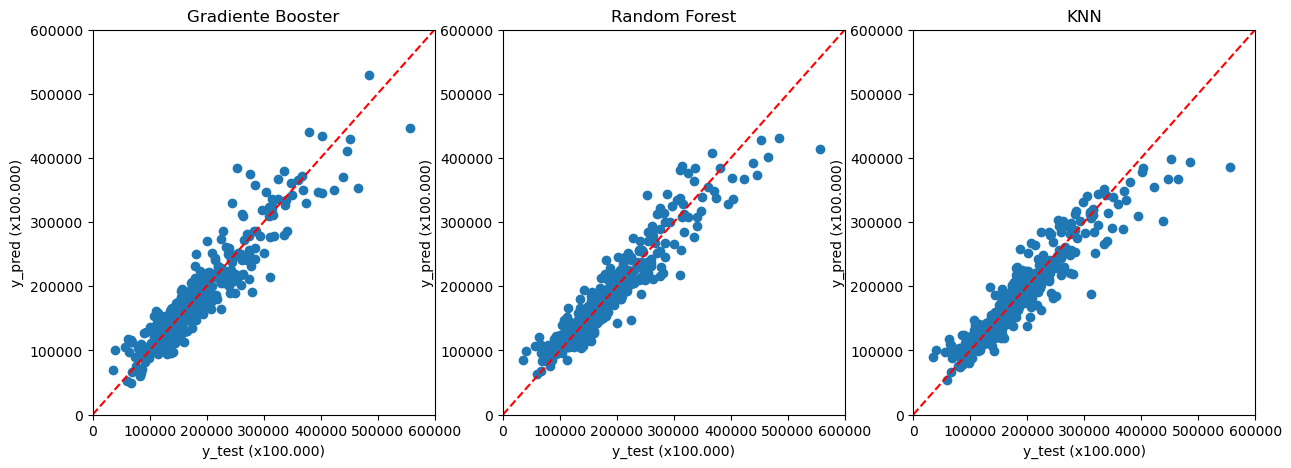

In [682]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test, y_pred_gbr)
ax[0].plot([0,600000],[0,600000],'--r')
ax[1].scatter(y_test, y_pred_rf)
ax[1].plot([0,600000],[0,600000],'--r')
ax[2].scatter(y_test, y_pred_KNN)
ax[2].plot([0,600000],[0,600000],'--r')

ax[0].set(xlim=(0, 600000),ylim=(0, 600000))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Gradiente Booster')
ax[1].set(xlim=(0, 600000),ylim=(0, 600000))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Random Forest')
ax[2].set(xlim=(0, 600000),ylim=(0, 600000))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

## Fazer previsão para os dados de teste

**Realizar mesmos tratamentos na base teste**

In [684]:
base_teste.shape

(1459, 74)

In [685]:
base_train.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_outros'], dtype=object)

#### Tratar colunas do tipo object

In [686]:
base_obj = base_train[base_train.select_dtypes(include=['object']).columns]

**Tratar colunas com apenas dois valores distintos**

In [687]:
base_binary

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y
1458,Pave,AllPub,Y


In [688]:
# Como existe uma predominância muito grande de uma só classe, podemos descartar essas colunas do modelo
base_teste = base_teste.drop(base_binary.columns, axis=1)
base_teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,7,2006,WD,Normal


**Tratar demais colunas object**

**Tratar colunas >40% threshold**

In [689]:
base_Nclass.columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'],
      dtype='object')

In [690]:
base_Nclass = base_teste[base_Nclass.columns.values]

In [691]:
binary_columns = []
threshold = 0.4

for col in base_Nclass.columns:
    most_frequent_value = base_Nclass[col].value_counts(normalize=True).max()
    if most_frequent_value >= threshold:
        binary_columns.append(col)

binary_columns

['LotShape',
 'HouseStyle',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [692]:
# Atribuindo 1 ao valor de maior frequencia e 0 aos demais
for i in binary_columns:
    base_teste[i] = base_teste[i].apply(lambda x: 1 if x == base_Nclass[i].value_counts().reset_index().iloc[0][0] else 0)

**Tratar demais colunas**

In [693]:
base_obj = base_teste[base_teste.select_dtypes(include=['object']).columns]
base_obj

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,...,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,Gable,CompShg,...,Rec,LwQ,GasA,SBrkr,Typ,TA,TA,Y,WD,Normal
1,RL,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,Hip,CompShg,...,ALQ,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Normal
2,RL,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,Gable,CompShg,...,GLQ,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Normal
3,RL,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,Gable,CompShg,...,GLQ,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Normal
4,RL,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,Gable,CompShg,...,ALQ,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,Gable,CompShg,...,Unf,Unf,GasA,SBrkr,Typ,NaN,NaN,Y,WD,Normal
1455,RM,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,Gable,CompShg,...,Rec,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Abnorml
1456,RL,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,Gable,CompShg,...,ALQ,Unf,GasA,SBrkr,Typ,TA,TA,Y,WD,Abnorml
1457,RL,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,Gable,CompShg,...,GLQ,Unf,GasA,SBrkr,Typ,NaN,NaN,Y,WD,Normal


In [694]:
# As 3 primeiras colunas vão ser descartadas pois ao utilizar o one hot encoder se transformariam em muitas colunas
base_teste = base_teste.drop(['Neighborhood','Exterior1st','Exterior2nd'], axis=1)

In [695]:
# Limitar em 4 valores
base_teste.BsmtFinType1 = base_teste['BsmtFinType1'].apply(lambda x: 'Unf' if x == 'Unf' else 'GLQ' if x == 'GLQ' else 'ALQ' if x == 'ALQ' else 'outros')

In [696]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe = ohe.fit(base_teste[['BsmtFinType1']])
ohe.transform(base_teste[['BsmtFinType1']]).toarray()
ohe_df = pd.DataFrame(ohe.transform(base_teste[['BsmtFinType1']]).toarray())
ohe_df.columns = ohe.get_feature_names_out()
ohe_df.head()

,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [697]:
# Drop da coluna BsmtFinType1 e concatenar com o OHE criado
base_teste = base_teste.drop('BsmtFinType1',axis=1)

In [698]:
base_teste = pd.concat([base_teste,ohe_df],axis=1)
base_teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
0,1461,20,RH,80.0,11622,1,Lvl,Inside,Gtl,Feedr,...,0,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0
1,1462,20,RL,81.0,14267,0,Lvl,Corner,Gtl,Norm,...,0,12500,6,2010,WD,Normal,1.0,0.0,0.0,0.0
2,1463,60,RL,74.0,13830,0,Lvl,Inside,Gtl,Norm,...,0,0,3,2010,WD,Normal,0.0,1.0,0.0,0.0
3,1464,60,RL,78.0,9978,0,Lvl,Inside,Gtl,Norm,...,0,0,6,2010,WD,Normal,0.0,1.0,0.0,0.0
4,1465,120,RL,43.0,5005,0,HLS,Inside,Gtl,Norm,...,0,0,1,2010,WD,Normal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,1,Lvl,Inside,Gtl,Norm,...,0,0,6,2006,WD,Normal,0.0,0.0,1.0,0.0
1455,2916,160,RM,21.0,1894,1,Lvl,Inside,Gtl,Norm,...,0,0,4,2006,WD,Abnorml,0.0,0.0,0.0,1.0
1456,2917,20,RL,160.0,20000,1,Lvl,Inside,Gtl,Norm,...,0,0,9,2006,WD,Abnorml,1.0,0.0,0.0,0.0
1457,2918,85,RL,62.0,10441,1,Lvl,Inside,Gtl,Norm,...,0,700,7,2006,WD,Normal,0.0,1.0,0.0,0.0


In [701]:
# Atribuir apenas as colunas da base de treino
col_test = base_train

In [702]:
base_teste = base_teste[col_test.columns.values]

### Tratar colunas com valores nulos

##### Tratar valores ausentes

In [703]:
nulos = base_teste.columns[base_teste.isnull().any()]
nulos

Index(['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [704]:
base_teste[nulos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   BsmtFinSF2    1458 non-null   float64
 2   BsmtUnfSF     1458 non-null   float64
 3   TotalBsmtSF   1458 non-null   float64
 4   BsmtFullBath  1457 non-null   float64
 5   BsmtHalfBath  1457 non-null   float64
 6   GarageYrBlt   1381 non-null   float64
 7   GarageCars    1458 non-null   float64
 8   GarageArea    1458 non-null   float64
dtypes: float64(9)
memory usage: 102.7 KB


In [705]:
base_null = base_teste[nulos]
base_null.head(3)

,LotFrontage,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,81.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,74.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0


**Tratar colunas numéricas**

In [706]:
# Valores numéricos
base_null.describe()

,LotFrontage,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,68.580357,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,22.376841,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,67.000000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,200.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [707]:
# Atribuir 0 aos valores ausentes das colunas com alta incidencia de zeros (>75%)
base_teste.fillna({
    'BsmtFullBath': 0,    
    'BsmtHalfBath': 0,    
    'cBsmtFinSF2': 0 ,
    'BsmtFinSF2': 0
}, inplace=True)

In [708]:
# Atribuir a mediana as demais colunas
base_teste.fillna({
    'LotFrontage': base_teste['LotFrontage'].median(),    
    'BsmtUnfSF': base_teste['BsmtUnfSF'].median(),    
    'TotalBsmtSF': base_teste['TotalBsmtSF'].median()      ,    
    'GarageYrBlt': base_teste['GarageYrBlt'].median()    ,    
    'GarageCars': base_teste['GarageCars'].median()    ,    
    'GarageArea': base_teste['GarageArea'].median()
}, inplace=True)

In [709]:
# Verificando se restaam valores nulos
base_teste.isnull().sum()

MSSubClass             0
LotFrontage            0
LotArea                0
LotShape               0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
ExterQual              0
Foundation             0
BsmtQual               0
BsmtExposure           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
HeatingQC              0
1stFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenAbvGr           0
KitchenQual            0
TotRmsAbvGrd           0
Fireplaces             0
GarageType             0
GarageYrBlt            0
GarageFinish           0
GarageCars             0
GarageArea             0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
MiscVal                0
MoSold                 0


## Comparar base treino e teste

In [710]:
# Filtrar colunas com diferentes cardinalidades para realizar tratamento restante
col_trat = base_teste.columns[base_train[base_teste.columns.values].nunique() != base_teste.nunique()] 
col_trat

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal'],
      dtype='object')

### Realizar mesma discretização

In [711]:
# Definindo nossa discretização
est = KBinsDiscretizer(n_bins=10, encode='ordinal')

In [712]:
# Fazendo o fit e transformando
est1 = est.fit(base_teste[['LotArea']])
base_teste['LotArea'] = est1.transform(base_teste[['LotArea']])
est2 = est.fit(base_teste[['BsmtUnfSF']])
base_teste['BsmtUnfSF'] = est2.transform(base_teste[['BsmtUnfSF']])
est3 = est.fit(base_teste[['TotalBsmtSF']])
base_teste['TotalBsmtSF'] = est3.transform(base_teste[['TotalBsmtSF']])
est4 = est.fit(base_teste[['1stFlrSF']])
base_teste['1stFlrSF'] = est4.transform(base_teste[['1stFlrSF']])
est5 = est.fit(base_teste[['GrLivArea']])
base_teste['GrLivArea'] = est5.transform(base_teste[['GrLivArea']])
est6 = est.fit(base_teste[['GarageArea']])
base_teste['GarageArea'] = est6.transform(base_teste[['GarageArea']])

In [713]:
# Verificando se essas colunas estão com mesma cardinalidade com a base treino
# Filtrar colunas com diferentes cardinalidades para realizar tratamento restante
col_trat = base_teste.columns[base_train[base_teste.columns.values].nunique() != base_teste.nunique()] 
col_trat

Index(['MSSubClass', 'LotFrontage', 'YearBuilt', 'BsmtFinSF2', 'LowQualFinSF',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

**Verificar se a coluna GarageYrBlt também apresenta valores inconsistentes**

In [714]:
# O valor máximo é inconsistente
base_teste.GarageYrBlt.describe()

count    1459.000000
mean     1977.789582
std        25.716061
min      1895.000000
25%      1960.500000
50%      1979.000000
75%      2001.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [715]:
base_teste.loc[base_teste.GarageYrBlt == 2207, 'GarageYrBlt'] = base_teste.GarageYrBlt.median()

**Normalização das colunas**

In [716]:
# Colunas com elevada incidencia de zeros
baseZ

Index(['LotShape', 'HouseStyle', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF2', 'HeatingQC', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageType', 'GarageFinish', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinType1_ALQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'BsmtFinType1_outros'],
      dtype='object')

**Dessas colunas utilizar a técnica MaxAbsScaler**

In [717]:
# Criando o scaler
scaler = MaxAbsScaler()

In [718]:
# Fazendo o fit com os dados
scaler = scaler.fit(base_teste[baseZ])

In [719]:
# Fazendo a transformação
base_teste[baseZ] = scaler.transform(base_teste[baseZ])

In [720]:
base_teste[baseZ].describe()

,LotShape,HouseStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF2,HeatingQC,LowQualFinSF,BsmtFullBath,...,GarageFinish,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.640164,0.510624,0.611378,0.453050,0.434544,0.651816,0.034458,0.515422,0.003330,0.144620,...,0.428376,0.023956,0.004984,0.029626,0.002180,0.003422,0.143249,0.295408,0.288554,0.272790
std,0.480117,0.500059,0.487604,0.497962,0.495867,0.476558,0.115792,0.499933,0.041394,0.176842,...,0.495013,0.066431,0.056133,0.098281,0.038115,0.037106,0.350447,0.456382,0.453245,0.445546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [721]:
base2 = base_teste.drop(baseZ,axis=1)
base2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.334476,4.503084,6.078821,5.553804,1971.357779,1983.662783,4.501714,4.509938,4.504455,4.505826,1.570939,2.854010,1.042495,6.385195,1977.633310,1.766278,4.512680,6.104181,2007.769705
std,42.746880,20.569211,2.873265,1.436812,1.113740,30.390071,21.130467,2.873266,2.871816,2.873979,2.870633,0.555190,0.829788,0.208472,1.508895,25.005168,0.775703,2.863674,2.722432,1.301740
min,20.000000,21.000000,0.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1895.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,2.000000,5.000000,5.000000,1953.000000,1963.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1960.500000,1.000000,2.000000,4.000000,2007.000000
50%,50.000000,67.000000,5.000000,6.000000,5.000000,1973.000000,1992.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,1.000000,6.000000,1979.000000,2.000000,5.000000,6.000000,2008.000000
75%,70.000000,78.000000,7.000000,7.000000,6.000000,2001.000000,2004.000000,7.000000,7.000000,7.000000,7.000000,2.000000,3.000000,1.000000,7.000000,2001.000000,2.000000,7.000000,8.000000,2009.000000
max,190.000000,200.000000,9.000000,10.000000,9.000000,2010.000000,2010.000000,9.000000,9.000000,9.000000,9.000000,4.000000,6.000000,2.000000,15.000000,2010.000000,5.000000,9.000000,12.000000,2010.000000


In [722]:
# Filtrar bases com possiveis outliers, valor máximo - terceiro quartil ser maior que o próprio terceiro quartil
print(base_OL) 
print(base_NOL)

Index(['MSSubClass', 'LotFrontage', 'BedroomAbvGr', 'KitchenAbvGr'], dtype='object')
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageYrBlt', 'GarageArea', 'MoSold', 'YrSold'],
      dtype='object')


**A normalização das features com outliers utiliza RobustScaler**

In [724]:
# Criando o scaler
RB_scaler = RobustScaler()

In [725]:
# Fazendo o fit com os dados
RB_scaler = RB_scaler.fit(base_teste[base_OL])

In [726]:
# Fazendo a transformação
base_teste[base_OL] = RB_scaler.transform(base_teste[base_OL])

In [727]:
base_teste[base_OL].describe()

,MSSubClass,LotFrontage,BedroomAbvGr,KitchenAbvGr
count,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.147567,0.074138,-0.145990,0.042495
std,0.854938,1.142734,0.829788,0.208472
min,-0.600000,-2.555556,-3.000000,-1.000000
25%,-0.600000,-0.388889,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.611111,0.000000,0.000000
max,2.800000,7.388889,3.000000,1.000000


**A normalização das features sem outliers utiliza StandardScaler**

In [728]:
# Criando nosso scaler
S_scaler = StandardScaler()

In [729]:
# Fazendo o fit com os dados
S_scaler = S_scaler.fit(base_teste[base_NOL])

In [730]:
# Fazendo o transform dos dados
base_teste[base_NOL] = S_scaler.transform(base_teste[base_NOL])

In [731]:
base_teste[base_OL].describe()

,MSSubClass,LotFrontage,BedroomAbvGr,KitchenAbvGr
count,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.147567,0.074138,-0.145990,0.042495
std,0.854938,1.142734,0.829788,0.208472
min,-0.600000,-2.555556,-3.000000,-1.000000
25%,-0.600000,-0.388889,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.611111,0.000000,0.000000
max,2.800000,7.388889,3.000000,1.000000


## Garantir mesmo range em todas colunas da base treino e teste

In [734]:
colunas = base_teste.columns

for i in colunas:
    # Inicializa o scaler com um range customizado
    scaler = MinMaxScaler(feature_range=(base_train[i].describe()[3], base_train[i].describe()[7]))
    
    # Ajusta o scaler nos dados de treino e transforma os dados de treino
    base_teste[i] = scaler.fit_transform(base_teste[[i]])

## Utilizar o modelo de maior desempenho na base teste

In [737]:
y_pred_gbr = best_gbr.predict(base_teste[:][feature_importance_GB.index[:performance_GB.index(min(performance_GB))]])


In [738]:
# Podemos adicionar essa coluna de previsão na nossa base
base_teste['SalePrice'] = y_pred_gbr

In [741]:
#base_teste = base_teste.reset_index()
base_id = pd.read_csv("test.csv") 
base_teste['Id'] = base_id.Id
base_teste

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,PoolArea,MiscVal,MoSold,YrSold,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_outros,SalePrice,Id
0,-0.6,2.539253,0.870592,1.0,1.0,-0.795151,0.381743,-0.426798,-1.156380,1.0,...,0.0,0.000000,-0.119110,1.645210,0.0,0.0,0.0,1.0,116417.078391,1461
1,-0.6,2.625110,1.567830,0.0,1.0,-0.071836,0.381743,-0.531470,-1.301740,1.0,...,0.0,0.735294,-0.119110,1.645210,1.0,0.0,0.0,0.0,133058.124196,1462
2,0.2,2.024111,1.219211,0.0,0.0,-0.795151,-0.517200,0.829262,0.636400,1.0,...,0.0,0.000000,-1.229111,1.645210,0.0,1.0,0.0,0.0,182252.539007,1463
3,0.2,2.367539,0.173354,0.0,0.0,-0.071836,0.381743,0.864152,0.636400,1.0,...,0.0,0.000000,-0.119110,1.645210,0.0,1.0,0.0,0.0,188559.010186,1464
4,1.4,-0.637460,-1.221121,0.0,1.0,1.374795,-0.517200,0.654809,0.345679,0.0,...,0.0,0.000000,-1.969111,1.645210,1.0,0.0,0.0,0.0,203424.512281,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2,-2.526316,-1.569740,1.0,0.0,-1.518467,1.280685,-0.112783,-0.720298,1.0,...,0.0,0.000000,-0.119110,-1.367655,0.0,0.0,1.0,0.0,79055.150314,2915
1455,2.2,-2.526316,-1.569740,1.0,0.0,-1.518467,-0.517200,-0.112783,-0.720298,1.0,...,0.0,0.000000,-0.859110,-1.367655,0.0,0.0,0.0,1.0,87869.697283,2916
1456,-0.6,9.407821,1.567830,1.0,1.0,-0.795151,1.280685,-0.461689,0.539493,1.0,...,0.0,0.000000,0.990891,-1.367655,1.0,0.0,0.0,0.0,153085.879417,2917
1457,0.7,0.993825,0.521973,1.0,0.0,-0.795151,-0.517200,0.654809,0.345679,1.0,...,0.0,0.041176,0.250891,-1.367655,0.0,1.0,0.0,0.0,135388.526959,2918


In [742]:
# E extrair somente o Id e o SalePrice
base_kaggle = base_teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,116417.078391
1,1462,133058.124196
2,1463,182252.539007


In [744]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultadoFinal.csv',index=False)